<a href="https://colab.research.google.com/github/tarun422/AirBnb-Data-Analysis/blob/main/EDA_CAPSTONE_PROJECT_ON_AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project - AirBnb Booking Analysis**

##**Project Type** - EDA
##**Contribution** - Individual
##**Name** - Tarun

# **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**
#**This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.**

# **GitHub Link -**

https://github.com/tarun422/AirBnb-Data-Analysis


# **Google Drive Link-**

https://drive.google.com/drive/folders/1PmEYGIJ0Dp1sJoD8Mw63rbS6HKK_SF3A

# **Problem Statement**
###1.Find which neighbourhood group contain maximum properties booking
###2. Which neighbourhood have maximum properties
###3. Which room type are most preferred by customers
###4. Which neighbourhood group got maximum reviews
###5. who hosts the maximum properties
###6. Price range distribution
###7. Find a luxury property according to there price in each neighbourhood_group?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#This '%matplotlib inline' use to show the chart just below the cell 

%matplotlib inline

### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

# Load DataSet from my googlr drive which is also present in your side

anb_df=pd.read_csv('/content/Mydrive/MyDrive/Airbnb NYC 2019.csv')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


### Dataset First View

In [3]:
# Top view of dataset

anb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Bottom view of dataset

anb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [5]:
# No. of Rows and Column

anb_df.shape

(48895, 16)

### Dataset Information

In [6]:
# Dataset Information

anb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Check Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# There is no Duplicate values

len(anb_df[anb_df.duplicated()])

0

## ***2. Understanding Your Variables***


In [8]:
# DataSet Columns

list(anb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

* **id:**It's a property id
* **name:**It's a name of the property
* **host_id:**It's a host id who register on AirBnb
* **host_name:**Name of the host who register on AirBnb
* **neighbourhood_group:**Name of the neighbourhood group
* **neighbourhood:**Name of the neighbourhood present in group
* **latitude:**Latitude of property
* **longitude:**longitude of property
* **room_type:**Different types of room
* **price:**Rent of the property
* **minimum_nights:**Minimum number of night spend by customer
* **number_of_reviews:**Number of customer reviews
* **calculated_host_listings_count:**Number of listing done by host
* **availability_365:**Represent the number of days when property is available


#**3. Handling Missing/Null Values**

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

print(anb_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


####Drop Column Which Contain Large Number Of Null Values

In [10]:
# Drop the column of last_rewiew and reviews_per_month by reverse indexing

anb_df.drop(anb_df.columns[[-3,-4]],axis=1,inplace=True)

In [11]:
# Check the column is drop or not

print(anb_df.isnull().sum())

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


### Fixing null values by replacing them with dummy string : 'No_Values'

In [12]:
# Replacing nan values
# Inplace-> apply the changes on Orignal DataSet

anb_df.replace(np.nan,'No_Values',inplace=True)

In [13]:
#Check that all values are notNull or not using isnull method

print(anb_df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [14]:
# count all notNull values

anb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

# **4. Let's Start Analysing the DataSet With Graphical Representation**

In [15]:
# DataSet Describe

anb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [16]:
# Columns with Numarical values

numarical_columns=anb_df[['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

#### Handling Outliers


In [17]:
# Calculate the median of the price

anb_df['price'].median()

106.0

In [18]:
# There are some very less price values for property in my opinion which may be not accurate 

print(anb_df.loc[anb_df['price']<10,'price'].count())


11


In [19]:
# Replace these values with median of price

anb_df.loc[anb_df['price']<10,'price']=anb_df['price'].median()

In [20]:
# chech there is any value left or not which is less then 20

anb_df.loc[anb_df['price']<10,'price']

Series([], Name: price, dtype: int64)

## **Analysing the Data**

In [21]:
# let's take a look of dataset using loc method

anb_df.loc[[0,1,2,3,4,5]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


## 1.Find which neighbourhood group contain maximum properties booking

In [22]:
# Count the neighbourhood groups using groupby method and dictinory

neighbourhood_group_count=dict(anb_df.groupby(['neighbourhood_group']).size())
neighbourhood_group_count

{'Bronx': 1091,
 'Brooklyn': 20104,
 'Manhattan': 21661,
 'Queens': 5666,
 'Staten Island': 373}

In [23]:
# assign axis values to plot a bar graph

neighbourhood_group_x_axis=neighbourhood_group_count.keys()
neighbourhood_group_y_axis=neighbourhood_group_count.values()

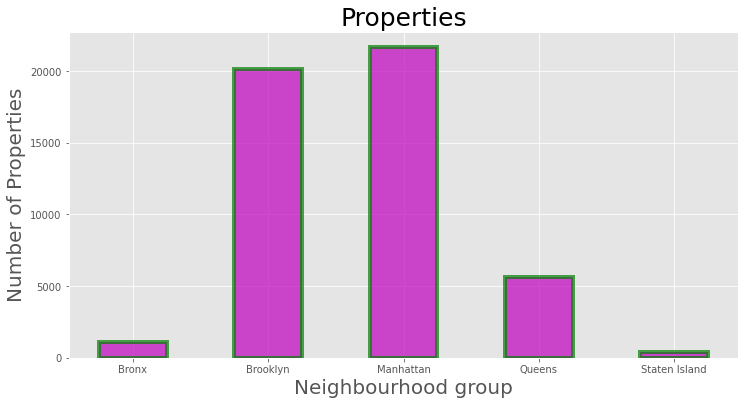

In [24]:
from matplotlib import colors
# Plot a Bar graph of number of neighbourhood groups using Matplotlib 

# set figure size
plt.rcParams['figure.figsize'] = (12,6)

# plot bar graph with style
style.use("ggplot")
plt.bar(neighbourhood_group_x_axis,neighbourhood_group_y_axis,width=0.5,color="m",edgecolor="g",linewidth=4,alpha=0.7)
plt.title("Properties",fontsize=25)
plt.xlabel("Neighbourhood group",fontsize=20)
plt.ylabel("Number of Properties",fontsize=20)
plt.show()

## 2. Which neighbourhood have maximum properties

In [25]:
# Count the nieghbourhood size and sort the values

neighbourhood_counts=dict(anb_df.groupby(['neighbourhood']).size().sort_values(ascending=False))

In [26]:
# Create list of top 6 area's using indexing and assign them 

neighbourhood_x_axis=list(neighbourhood_counts.keys())[:6]
neighbourhood_y_axis=list(neighbourhood_counts.values())[:6]

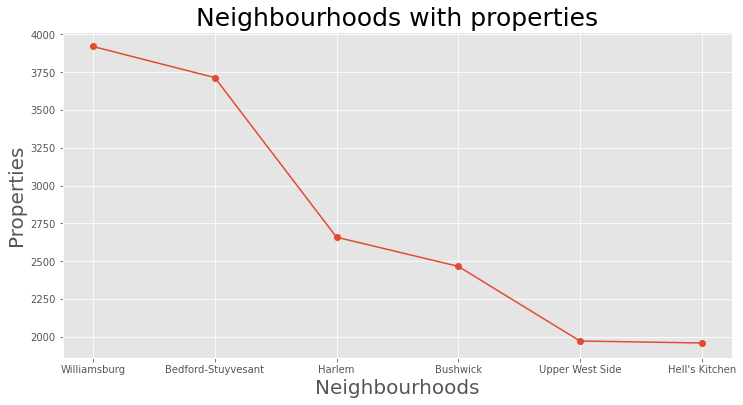

In [27]:
# plot a graph of top 6 prefered area 

#set the figure size
plt.rcParams['figure.figsize'] = (12,6)

# ploting graph with style 
plt.plot(neighbourhood_x_axis,neighbourhood_y_axis,marker="o")
plt.title("Neighbourhoods with properties",fontsize=25)
plt.xlabel("Neighbourhoods",fontsize=20)
plt.ylabel("Properties",fontsize=20)
# showowing the graph
plt.show()

## 3. Which room type are most preferred by customers


In [28]:
# Count the size of the different types of room

room_types=dict(anb_df.groupby(['room_type']).size())
room_types

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

In [29]:
# assign list of number of rooms
no_of_rooms=room_types.values()

# assign list of types of room
types_of_room=room_types.keys()

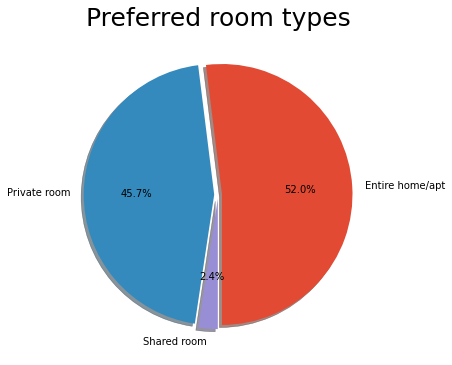

In [30]:
# ploting a pie plot 

explod=[0.03,0.03,0.03]
plt.pie(no_of_rooms,labels=types_of_room,startangle=270,explode=explod,autopct="%0.1f%%",shadow=True)
plt.title("Preferred room types",fontsize=25)
plt.show()

## 4. Which neighbourhood group got maximum reviews

In [31]:
# group the neighbourhood_group by groupby method
neighbourhood_reviews = anb_df.groupby(['neighbourhood_group'])

# combine with number_of reviews
neighbourhood_reviews = anb_df.groupby(['neighbourhood_group'])['number_of_reviews']

# getting the maximum using max function
neighbourhood_reviews = anb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max()

# Sort the values by sort_value method
neighbourhood_reviews = anb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().sort_values(ascending = False)

# reset the index using reset_index method
neighbourhood_reviews = anb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().sort_values(ascending = False).reset_index()

# print the dataframe
neighbourhood_reviews

,neighbourhood_group,number_of_reviews
0,Queens,629
1,Manhattan,607
2,Brooklyn,488
3,Staten Island,333
4,Bronx,321


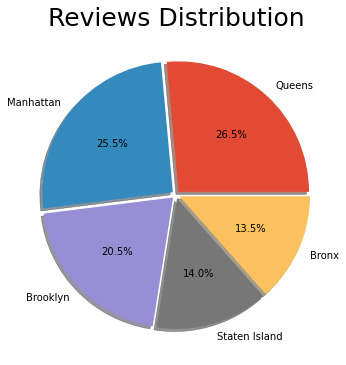

In [32]:
# plot pie chart of number of reviews with respect of there neighbourhood

neighbourhood_reviews_value=neighbourhood_reviews['number_of_reviews']
neighbourhood_reviews_label=neighbourhood_reviews['neighbourhood_group']
explode_b=[0.03,0.03,0.03,0.03,0.03]
plt.pie(neighbourhood_reviews_value,labels=neighbourhood_reviews_label,autopct='%0.1f%%',shadow=True,explode=explode_b)
plt.title("Reviews Distribution",fontsize=25)
plt.show()

## 5. who hosts the maximum properties

In [33]:
# group the neighbourhood_group by groupby method
max_host = anb_df.groupby(['host_name'])

# combine with calculated_host_listing_count
max_host=anb_df.groupby(['host_name'])['calculated_host_listings_count']

# getting the maximum using max function
max_host=anb_df.groupby(['host_name'])['calculated_host_listings_count'].max()

# Sort the values by sort_value method
max_host=anb_df.groupby(['host_name'])['calculated_host_listings_count'].max().sort_values(ascending = False)

# reset the index using reset_index method
max_host=anb_df.groupby(['host_name'])['calculated_host_listings_count'].max().sort_values(ascending = False).reset_index()

# got top 5 values using head method
max_host.head(5)

,host_name,calculated_host_listings_count
0,Sonder (NYC),327
1,Blueground,232
2,Kara,121
3,Kazuya,103
4,Sonder,96


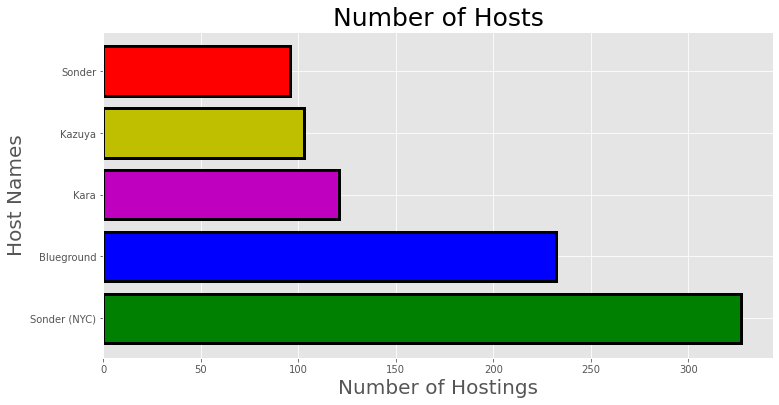

In [34]:
max_host_x=list(max_host['host_name'])[:5]
max_host_y=list(max_host['calculated_host_listings_count'])[:5]
plt.barh(max_host_x,max_host_y,color=["g","b","m","y","r"],edgecolor="k",linewidth=3)
plt.title("Number of Hosts",fontsize=25)
plt.ylabel("Host Names",fontsize=20)
plt.xlabel("Number of Hostings",fontsize=20)
plt.show()

**Sonder(NYC) hosts maximum number of properties**

In [35]:
anb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## 6. Price range distribution

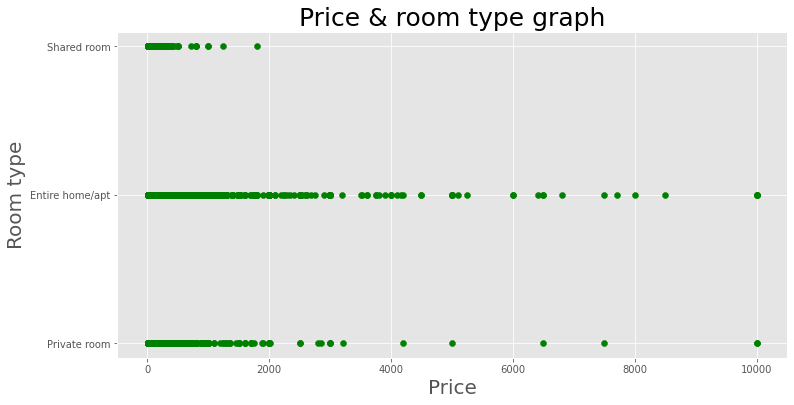

In [36]:
# plot a scatter graph between room type and price

x_room_type=anb_df['room_type']
y_room_type=anb_df['price']
plt.scatter(y_room_type,x_room_type,c="g")
plt.title("Price & room type graph",fontsize=25)
plt.xlabel("Price",fontsize=20)
plt.ylabel("Room type",fontsize=20)
plt.show()

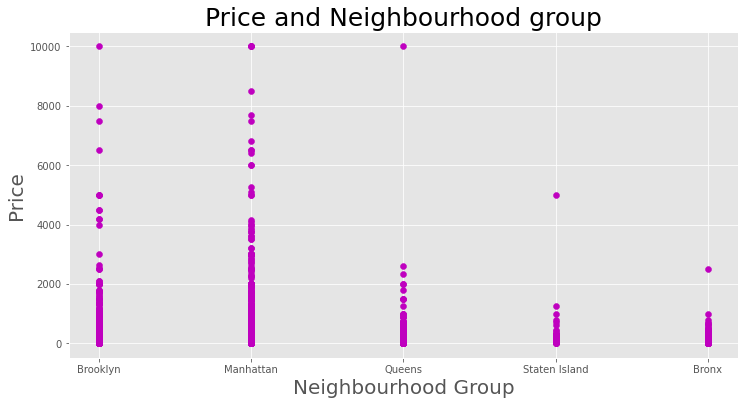

In [37]:
# plot a scatter graph between price and neighbourhood groups

xx=anb_df['price']
yy=anb_df['neighbourhood_group']
plt.scatter(yy,xx,c="m")
plt.title("Price and Neighbourhood group",fontsize=25)
plt.xlabel("Neighbourhood Group",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()

## 7. Find a luxury property according to there price in each neighbourhood_group?

In [38]:
# finding top price property according to neighbourhood_group 

luxury=anb_df.groupby(['neighbourhood_group'])['price'].max().sort_values()
luxury

neighbourhood_group
Bronx             2500
Staten Island     5000
Brooklyn         10000
Manhattan        10000
Queens           10000
Name: price, dtype: int64

In [39]:
# Finding details about luxury properties

anb_df.loc[anb_df['price']==10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,1,83


#**Project Summary**



* Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.

* In this EDA Project, We were provided with sixteen Attributes are id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listing_count, availability_365 which are used for data analysis.

* As the first step, getting view of dataset and perform data handling on the dataset like as handling missing values and replacing null values.

* After this, My first aim is handling outliers like price of some properties are zero, which is probably inaccurate.

* In analysis, I found which area got maximum properties booking which is beneficial for customer to select most preferred location and which neighborhood have maximum properties to getting some discount and which room type is preferred by customers to get an idea of customer choices.

* After that checking review that is who getting a maximum reviews that is another beneficial segment to select a property for stay.

* Analysis on price distribution is most important for all because Price is a top rated thing that a human consider according to their budget and facilities.

* After that finding some expensive and luxurious properties for business purpose according to their locations.


https://github.com/tarun422/AirBnb-Data-Analysis

# **Conclusion**

* Neighbourhood groups Manhattan and Brooklyn jointly hosts the properties which is more than 85% of the total hostings.Rest of the other like Bronx, Queens and staten island jointly hosts the properties which Is less than 15%. Most of the customers stay in either Manhattan or Brooklyn.

* The area Williamsburg and Bedford-Stuyvesant are hold most of the properties which are 3920 and 3714 respectively.Both are present in Brooklyn. So, we can say that in brooklyn most preferred area is Williamsburg and Bedford-Stuyvesant.

* Preferred room types are either a private room or a entire home.Very less customers are preferred a share room which is obviously due to some privacy.

* All neighbourhood groups are getting equal reviews according to there hosting.
But interesting thing is Queens which is host around 12% but getting more than 26% of reviews which is more than Brooklyn and the Manhattan as compare to their hosting and this is highest.

* Sonder(NYC) hosting maximum number of host followed by blueground.

* People want to spend less price as we see in this analysis.
